# PHY2109 Tutorial 1
References:
- Hastie Tibshirani and Friedman., Elements of Statistical Learning. Springer (2017).
- P. Mehta, et al., A high-bias, low-variance introduction to Machine Learning for physicists. Physical Reports (2019).
- https://github.com/drckf/mlreview_notebooks/blob/master/jupyter_notebooks/notebooks/NB2_CIV-gradient_descent.ipynb

## Gradient Descent

Gradient descent methods are the most frequently used algorithms to select 'good' model parameters. In most cases, 'good' means that the model recapitulates training data well, which we generally hope means that the model will also make accurate predictions on never-before-seen inputs.

Let's define a few terms:
 - $\mathbf{X} \in \mathbb{R}^{N\times p}$ is our training data inputs, which contains $N$ data points of $p$ features
 - $y \in \mathbb{R}^N$ is our training data outputs, which we will take as scalars. For vector outputs all of the following analysis can be repeated with a sum over the $K$ output dimensions.
 - $f(x|\mathbf{\theta})$ is our model mapping input $x \in \mathbf{X}$ to predicted output $\hat{y} = f(x)$. Our model prediction depends on the parameters $\mathbf{\theta}$
 - $R\big(\mathbf{X}, f(\mathbf{X,\theta})\big)$ is the cost function that we use to judge our model's performance.

For regression tasks we typically use sum-of-squared errors for our cost function:
$R\big(\mathbf{X}, f(\mathbf{X,\theta})\big) = \sum_{i=1}^N (y_i - f(x_i|\mathbf{\theta}))^2$

For classification tasks (with $K$ classes) we typically use cross-entropy for our cost function:
$R\big(\mathbf{X}, f(\mathbf{X,\theta})\big) = -\sum_{i=1}^N \sum_{k=1}^K y_{ik} \text{log} f_{k}(x_i|\mathbf{\theta})$

   \- note that cross-entropy is an example of a vector output, where $y_k$ is the probability of being in class $k$
   
Simple first-order gradient descent follows in a very straightforward manner from the idea that we wish to minimize the value of our cost function by changing the model parameters $\mathbf{\theta}$. We simply initialize the parameters to $\mathbf{\theta}_0$ and then iteratively update them according to the equation

$$\mathbf{v}_t = \eta_t \nabla_\theta R(\mathbf{\theta})\\
\mathbf{\theta}_{t+1} = \mathbf{\theta}_t - \mathbf{v}_t$$

In the context of neural networks this is often called *backpropagation*.
The choice of learning rate $\eta_t$ is very important for determining the convergence of the iteration procedure. It is not uncommon to choose something like an annealing schedule for the learning rate.

Another common (virtually essential) modification of gradient descent is to use subsamples of our training data $\mathbf{X}$, called minibatches. This is called stochastic gradient descent (SGD) and is performed by taking one step of gradient descent on a minibatch, and then selecting a new minibatch and repeating the process. A cycle of minibatches which covers the entire training data set is called an *epoch*. SGD has several benefits:
 - Since the gradient at each step depends on the randomly sampled minibatch, randomness is introduced to the trajectory through parameter space. This helps to avoid getting stuck in local minima.
 - Since each step of gradient descent requires a sum over all data points, using smaller minibatches allows more gradient descent steps in the same amount of computational time. 
 - It's been observed that SGD tends to yield more generalizable models, somehow avoiding overfitting to the training data.

A third common modification of gradient descent is to add momentum to the trajectory through parameter space. The simplest way of doing this is to follow the modified update rule:

$$\mathbf{v}_t = \gamma \mathbf{v}_{t-1}+\eta_t \nabla_\theta R(\mathbf{\theta})\\
\mathbf{\theta}_{t+1} = \mathbf{\theta}_t - \mathbf{v}_t$$

Finally, several popular gradient descent methods make use of normal SGD but use the second moment of the gradient to weight the update rule. For example, in the RMSprop algorithm the update step is weighted by the second moment as:

$$\mathbf{v}_t = \eta_t \nabla_\theta R(\mathbf{\theta})\\
\mathbf{s}_t = \beta \mathbf{s}_{t-1} + (1-\beta)\mathbf{v}_t^2\\
\mathbf{\theta}_{t+1} = \mathbf{\theta}_t - \frac{\mathbf{v}_t}{\sqrt{\mathbf{s}_t + \epsilon}}$$
where $\epsilon \approx 10^{-8}$ is added to avoid dividing by zero, and all operations involving $\mathbf{s}_t$ are performed element-wise.

## Code Examples
Let's take a look at how gradient descent can be implemented in practice.
First, we'll try writing our own basic gradient descent algorithm.

In [9]:
def MSEgradient(x, theta):
    return 2*a*x

# Gradient based methods
def gd(grad, init, n_epochs=1000, eta=10**-4, noise_strength=0):
    #This is a simple optimizer
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj


def gd_with_mom(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=gamma*v+eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

In [10]:
# Define a cost function to operate on
def minima_surface(x,y,a=1,b=1):
    return a*x**2+b*y**2-1

def grad_minima_surface(params,a=1,b=1):
    x=params[0]
    y=params[1]
    grad_x= 2*a*x
    grad_y= 2*b*y
    return [grad_x,grad_y]

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
#from matplotlib import animation
from IPython.display import HTML
from matplotlib.colors import LogNorm
#from itertools import zip_longest

#Import Numpy
import numpy as np

#Define function for plotting 

def plot_surface(x, y, z, azim=-60, elev=40, dist=10, cmap="RdYlBu_r"):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plot_args = {'rstride': 1, 'cstride': 1, 'cmap':cmap,
             'linewidth': 20, 'antialiased': True,
             'vmin': -2, 'vmax': 2}
    ax.plot_surface(x, y, z, **plot_args)
    ax.view_init(azim=azim, elev=elev)
    ax.dist=dist
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-2, 2)
    
    plt.xticks([-1, -0.5, 0, 0.5, 1], ["-1", "-1/2", "0", "1/2", "1"])
    plt.yticks([-1, -0.5, 0, 0.5, 1], ["-1", "-1/2", "0", "1/2", "1"])
    ax.set_zticks([-2, -1, 0, 1, 2])
    ax.set_zticklabels(["-2", "-1", "0", "1", "2"])
    
    ax.set_xlabel("x", fontsize=18)
    ax.set_ylabel("y", fontsize=18)
    ax.set_zlabel("z", fontsize=18)
    return fig, ax;

def overlay_trajectory_quiver(ax,obj_func,trajectory, color='k'):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    zs=obj_func(xs,ys)
    ax.quiver(xs[:-1], ys[:-1], zs[:-1], xs[1:]-xs[:-1], ys[1:]-ys[:-1],zs[1:]-zs[:-1],color=color,arrow_length_ratio=0.3)
    
    return ax;

def overlay_trajectory(ax,obj_func,trajectory,label,color='k'):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    zs=obj_func(xs,ys)
    ax.plot(xs,ys,zs, color, label=label)
    
    return ax;

    
def overlay_trajectory_contour_M(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    ax.plot(xs[-1],ys[-1],color+'>', markersize=14)
    return ax;

def overlay_trajectory_contour(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    return ax;

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Investigate effect of learning rate in GD
a,b = 1.0,1.0
x, y = np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
z=np.abs(minima_surface(x,y,a,b))

#initial point
init1=[-2,4]
init2=[-1.7,4]
init3=[-1.5,4]
init4=[-3,4.5]

# learning rates
eta1=0.1
eta2=0.5
eta3=1
eta4=1.01

# We'll make good use of this plotting function
def overlay_trajectory_contour(ax, trajectory, label, color='k', lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs, ys, color, label=label, lw=lw)
    return ax;

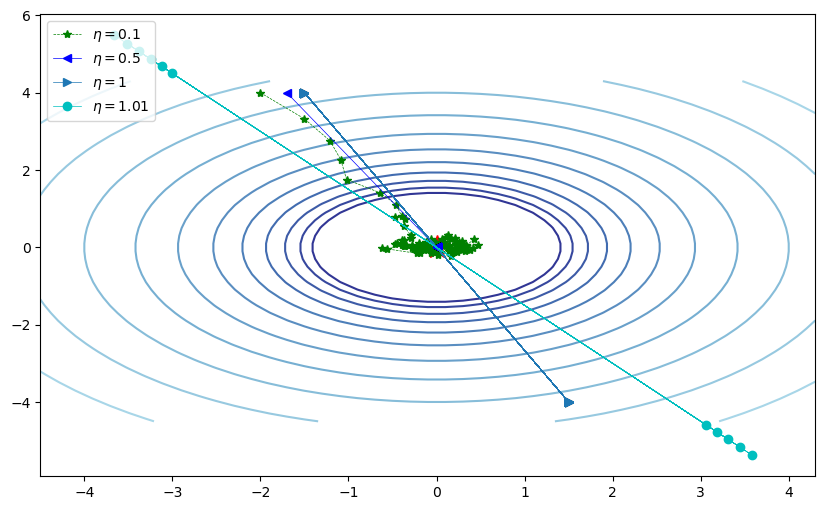

In [4]:
# Plot the cost function contours
fig, ax = plt.subplots(figsize=(10, 6))
ax.contour(x, y, z, levels=np.logspace(0.0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

# Compute trajectories over the cost function
gd_1=gd(grad_minima_surface,init1, n_epochs=100, eta=eta1, noise_strength=1)
gd_2=gd(grad_minima_surface,init2, n_epochs=100, eta=eta2)
gd_3=gd(grad_minima_surface,init3, n_epochs=100, eta=eta3)
gd_4=gd(grad_minima_surface,init4, n_epochs=10, eta=eta4)

# Plot the trajectories
overlay_trajectory_contour(ax,gd_1,'$\eta=$%s'% eta1,'g--*', lw=0.5)
overlay_trajectory_contour(ax,gd_2,'$\eta=$%s'% eta2,'b-<', lw=0.5)
overlay_trajectory_contour(ax,gd_3,'$\eta=$%s'% eta3,'->', lw=0.5)
overlay_trajectory_contour(ax,gd_4,'$\eta=$%s'% eta4,'c-o', lw=0.5)
plt.legend(loc=2)
plt.show()

### Exercises

1. Investigate these trajectories a bit further. What is the qualitative behaviour for each choice of learning rate $\eta$?

2. Repeat this analysis using gradient descent with momentum. What order of magnitude of learning rate do you need to reproduce each of the qualitative behaviours seen previously?

## Regularized Linear Regression

For many problems, iterative gradient descent methods are unnecessary because a model which is linear in the data features is sufficient for our performance objectives. In many cases, the linear weights of the model can be solved analytically when the number of data points $N$ is greater than the number of features $p$. For example, ordinary least-square regression assumes we can model our data linearly as
$$
y_i = \textbf{w}^T \textbf{x}_i
$$
where $\textbf{w}$ is chosen to minimize the $\text{L}_2$ norm:
$$
\text{min}||\mathbf{X}\textbf{w}-y||_2 = \text{min}\sum_{i=1}^N(\textbf{w}^T\textbf{x}_i-y_i)^2
$$
Note that this can be framed like in the previous section as minimizing a cost function $R(\mathbf{w})=||\mathbf{X}\textbf{w}-y||_2$. Alternatively, this process can be viewed in a Bayesian framework as maximizing the log-likelihood distribution. In this case we are assuming a Gaussian likelihood distribution $\mathcal{N}(y|\mu(\mathbf{x})=\mathbf{w}^T\mathbf{x},\sigma^2)$.

Minimization is performed by differentiating w.r.t. $\mathbf{w}$:
$$
0=2\mathbf{X}^T(\mathbf{X}\textbf{w}-y)
$$
which has an analytic solution
$$
\hat{\mathbf{w}}_{LS}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
$$

Of course, this solution only exists when $\mathbf{X}^T\mathbf{X}$ is invertible, which is typically the case when $N\gg p$.

Most of the time, people do not use ordinary least-squares regression because overfitting the data reduces generalization. Adding a *regularization* penalty term to the least-squares cost function helps to avoid overfitting and also tends to shrink the model parameter values, thereby indicating which variables might be most important for the model's predictive power. For this reason, these are sometimes called shrinkage methods.

For historical reasons, adding an $L_2$ penalty term to the least-squares cost function is called *Ridge regression*, while adding an $L_1$ penalty term is called *LASSO*.
$$
R(\mathbf{w})_{\text{Ridge}}=||\mathbf{X}\textbf{w}-y||_2 + \lambda ||\mathbf{w}||_2
$$
$$
R(\mathbf{w})_{\text{LASSO}}=||\mathbf{X}\textbf{w}-y||_2 + \lambda ||\mathbf{w}||_1
$$
The most important thing to note here is that LASSO tends to set the parameter weights for unimportant features to zero, which makes it valuable as a way to select which features of the dataset to focus on.

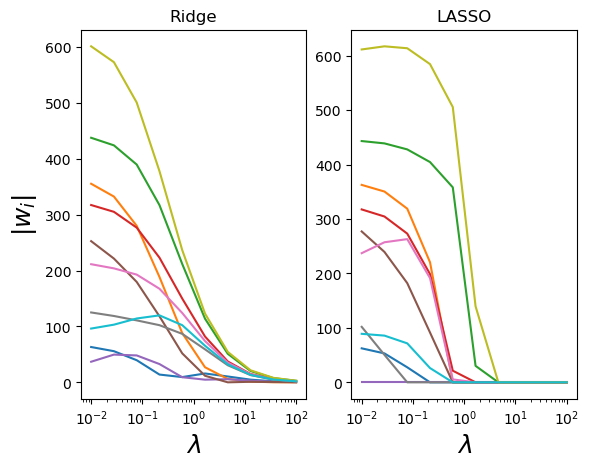

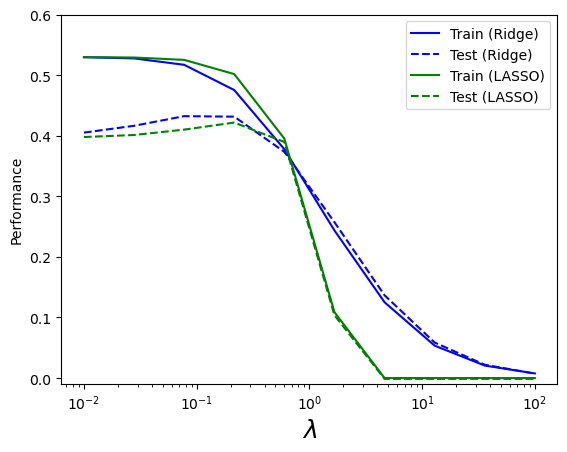

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model

# Load Training Data set with 200 examples

number_examples=200
diabetes = datasets.load_diabetes()
X = diabetes.data[:number_examples]
y = diabetes.target[:number_examples]

# Set up Lasso and Ridge Regression models
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()


# Chooose paths
lambdas = np.logspace(-2, 2, 10)

# To see how well we learn, we partition the dataset into a training set with 150 
# examples as well as a test set with 50 examples. We record their errors respectively.

n_samples_train = 150
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = y[:n_samples_train], y[n_samples_train:]
train_errors_ridge = list()
test_errors_ridge = list()

train_errors_lasso = list()
test_errors_lasso = list()



# Initialize coeffficients for ridge regression and Lasso

coefs_ridge = []
coefs_lasso=[]
for l in lambdas:
    ridge.set_params(alpha=l)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
    # Use the coefficient of determination R^2 as the performance of prediction.
    train_errors_ridge.append(ridge.score(X_train, y_train))
    test_errors_ridge.append(ridge.score(X_test, y_test))
    
    lasso.set_params(alpha=l)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    train_errors_lasso.append(lasso.score(X_train, y_train))
    test_errors_lasso.append(lasso.score(X_test, y_test))
    
###############################################################################
# Display results

# First see how the 10 features we learned scale as we change the regularization parameter
plt.subplot(1,2,1)
plt.semilogx(lambdas, np.abs(coefs_ridge))
axes = plt.gca()
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('$|w_i|$',fontsize=18)
plt.title('Ridge')

plt.subplot(1,2,2)
plt.semilogx(lambdas, np.abs(coefs_lasso))
axes = plt.gca()
plt.xlabel(r'$\lambda$',fontsize=18)
plt.title('LASSO')
plt.show()

# Plot our performance on both the training and test data
plt.semilogx(lambdas, train_errors_ridge, 'b',label='Train (Ridge)')
plt.semilogx(lambdas, test_errors_ridge, '--b',label='Test (Ridge)')
plt.semilogx(lambdas, train_errors_lasso, 'g',label='Train (LASSO)')
plt.semilogx(lambdas, test_errors_lasso, '--g',label='Test (LASSO)')
plt.legend(loc='upper right')
plt.ylim([-0.01, 0.6])
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('Performance')
plt.show()

## Exercises
1. What do the points $\lambda=0$ and $\lambda=10^5$ correspond to?
2. Each of the cost functions of Ordinary Least-Squares regression, Ridge regression, and LASSO corresponds to maximizing a posterior probability function. In the case of OLS regression, we saw that the cost function was effectively the log-likelihood distribution $\mathcal{N}(y|\mu(\mathbf{x})=\mathbf{w}^T\mathbf{x},\sigma^2)$. For Ridge regression and LASSO the same likelihood distribution $p(y|\mathbf{x},\mathbf{w})=\mathcal{N}(y|\mu(\mathbf{x})=\mathbf{w}^T\mathbf{x},\sigma^2)$ can be updated by a prior using Bayes' theorem: $p_{\text{posterior}} = p(y|\mathbf{x},\mathbf{w})p(\mathbf{w})$. What prior distributions do the penalty terms correspond to in Ridge regression and LASSO regression?

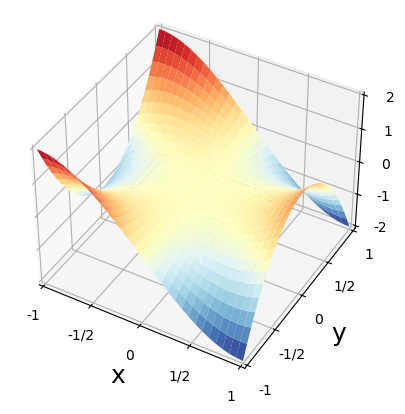

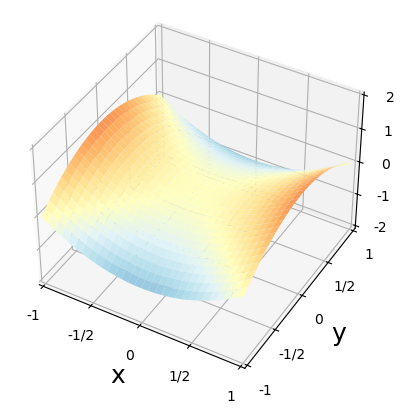

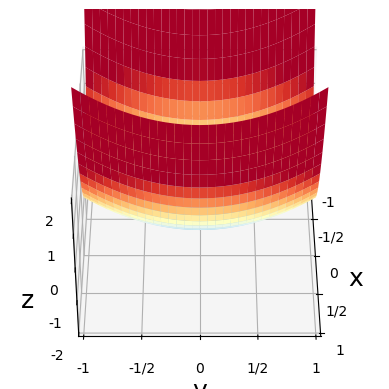

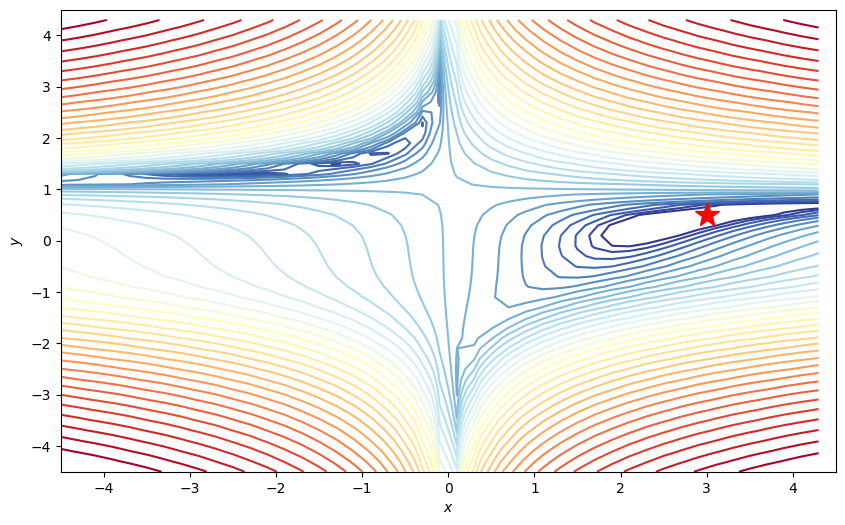

In [6]:
def monkey_saddle(x,y):
    return x**3 - 3*x*y**2

def grad_monkey_saddle(params):
    x=params[0]
    y=params[1]
    grad_x= 3*x**2-3*y**2
    grad_y= -6*x*y
    return [grad_x,grad_y]

#Define saddle surface

def saddle_surface(x,y,a=1,b=1):
    return a*x**2-b*y**2

def grad_saddle_surface(params,a=1,b=1):
    x=params[0]
    y=params[1]
    grad_x= a*x
    grad_y= -1*b*y
    return [grad_x,grad_y]


# Define minima_surface

def minima_surface(x,y,a=1,b=1):
    return a*x**2+b*y**2-1

def grad_minima_surface(params,a=1,b=1):
    x=params[0]
    y=params[1]
    grad_x= 2*a*x
    grad_y= 2*b*y
    return [grad_x,grad_y]


def beales_function(x,y):
    return np.square(1.5-x+x*y)+np.square(2.25-x+x*y*y)+np.square(2.625-x+x*y**3)
    return f

def grad_beales_function(params):
    x=params[0]
    y=params[1]
    grad_x=2*(1.5-x+x*y)*(-1+y)+2*(2.25-x+x*y**2)*(-1+y**2)+2*(2.625-x+x*y**3)*(-1+y**3)
    grad_y=2*(1.5-x+x*y)*x+4*(2.25-x+x*y**2)*x*y+6*(2.625-x+x*y**3)*x*y**2
    return [grad_x,grad_y]

def contour_beales_function():
    #plot beales function
    x, y = np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
    fig, ax = plt.subplots(figsize=(10, 6))
    z=beales_function(x,y)
    cax = ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
    ax.plot(3,0.5, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    ax.set_xlim((-4.5, 4.5))
    ax.set_ylim((-4.5, 4.5))
    
    return fig,ax
    
#Make plots of surfaces
plt.close() # closes previous plots
x, y = np.mgrid[-1:1:31j, -1:1:31j]
fig1,ax1=plot_surface(x,y,monkey_saddle(x,y))
fig2,ax2=plot_surface(x,y,saddle_surface(x,y))
fig3,ax3=plot_surface(x,y,minima_surface(x,y,5),0)

#Contour plot of Beale's Function

fig4,ax4 =contour_beales_function()
plt.show()

In [7]:
#Mean-gradient based methods
def gd(grad, init, n_epochs=1000, eta=10**-4, noise_strength=0):
    #This is a simple optimizer
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

#Momentum Based Methods
def gd_with_mom(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=gamma*v+eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

#Noisy methods: Nesterov
def NAG(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        params_nesterov=params-gamma*v
        v=gamma*v+eta*(np.array(grad(params_nesterov))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

#Second moment methods: RMSprop
def rms_prop(grad, init, n_epochs=5000, eta=10**-3, beta=0.9,epsilon=10**-8,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init#Import relevant packages
    grad_sq=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v=eta*np.divide(g,np.sqrt(grad_sq+epsilon))
        params= params-v
        param_traj[j+1,]=params
    return param_traj

# You look at the equations once and use them blindly
def adams(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    grad_sq=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        v=gamma*v+(1-gamma)*g
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v_hat=v/(1-gamma)
        grad_sq_hat=grad_sq/(1-beta)
        params=params-eta*np.divide(v_hat,np.sqrt(grad_sq_hat+epsilon))
        param_traj[j+1,]=params
    return param_traj

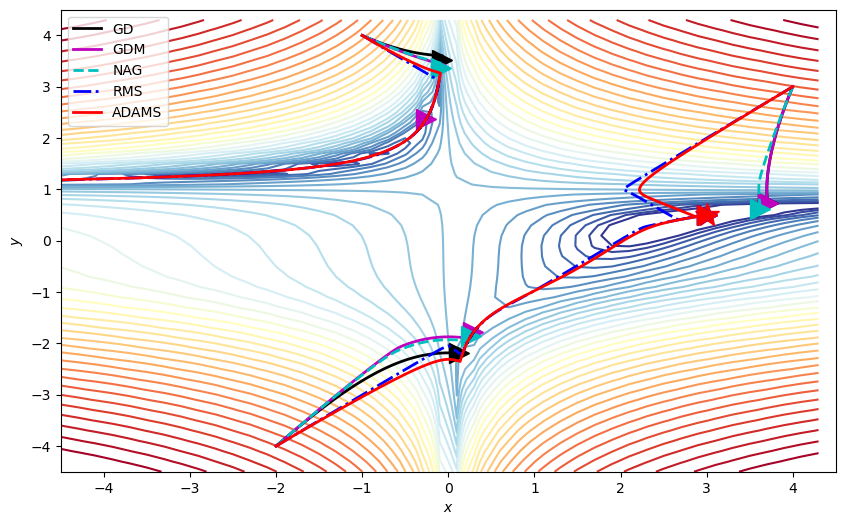

In [8]:
plt.close()
#Make static plot of the results
Nsteps=10**4
lr_l=10**-3
lr_s=10**-6

init1=np.array([4,3])
fig1, ax1=contour_beales_function()

gd_trajectory1=gd(grad_beales_function,init1,Nsteps, eta=lr_s, noise_strength=0)
gdm_trajectory1=gd_with_mom(grad_beales_function,init1,Nsteps,eta=lr_s, gamma=0.9,noise_strength=0)
NAG_trajectory1=NAG(grad_beales_function,init1,Nsteps,eta=lr_s, gamma=0.9,noise_strength=0)
rms_prop_trajectory1=rms_prop(grad_beales_function,init1,Nsteps,eta=lr_l, beta=0.9,epsilon=10**-8,noise_strength=0)
adam_trajectory1=adams(grad_beales_function,init1,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=0)

overlay_trajectory_contour_M(ax1,gd_trajectory1, 'GD','k')
overlay_trajectory_contour_M(ax1,gd_trajectory1, 'GDM','m')
overlay_trajectory_contour_M(ax1,NAG_trajectory1, 'NAG','c--')
overlay_trajectory_contour_M(ax1,rms_prop_trajectory1,'RMS', 'b-.')
overlay_trajectory_contour_M(ax1,adam_trajectory1,'ADAMS', 'r')

plt.legend(loc=2)
init3=np.array([-1,4])

gd_trajectory3=gd(grad_beales_function,init3,10**5, eta=lr_s, noise_strength=0)
gdm_trajectory3=gd_with_mom(grad_beales_function,init3,10**5,eta=lr_s, gamma=0.9,noise_strength=0)
NAG_trajectory3=NAG(grad_beales_function,init3,Nsteps,eta=lr_s, gamma=0.9,noise_strength=0)
rms_prop_trajectory3=rms_prop(grad_beales_function,init3,Nsteps,eta=lr_l, beta=0.9,epsilon=10**-8,noise_strength=0)
adam_trajectory3=adams(grad_beales_function,init3,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=0)

overlay_trajectory_contour_M(ax1,gd_trajectory3, 'GD','k')
overlay_trajectory_contour_M(ax1,gdm_trajectory3, 'GDM','m')
overlay_trajectory_contour_M(ax1,NAG_trajectory3, 'NAG','c--')
overlay_trajectory_contour_M(ax1,rms_prop_trajectory3,'RMS', 'b-.')
overlay_trajectory_contour_M(ax1,adam_trajectory3,'ADAMS', 'r')

init4=np.array([-2,-4])

gd_trajectory4=gd(grad_beales_function,init4,Nsteps, eta=lr_s, noise_strength=0)
gdm_trajectory4=gd_with_mom(grad_beales_function,init4,Nsteps,eta=lr_s, gamma=0.9,noise_strength=0)
NAG_trajectory4=NAG(grad_beales_function,init4,Nsteps,eta=lr_s, gamma=0.9,noise_strength=0)
rms_prop_trajectory4=rms_prop(grad_beales_function,init4,Nsteps,eta=lr_l, beta=0.9,epsilon=10**-8,noise_strength=0)
adam_trajectory4=adams(grad_beales_function,init4,Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=0)

overlay_trajectory_contour_M(ax1,gd_trajectory4, 'GD','k')
overlay_trajectory_contour_M(ax1,gdm_trajectory4, 'GDM','m')
overlay_trajectory_contour_M(ax1,NAG_trajectory4, 'NAG','c--')
overlay_trajectory_contour_M(ax1,rms_prop_trajectory4,'RMS', 'b-.')
overlay_trajectory_contour_M(ax1,adam_trajectory4,'ADAMS', 'r')

plt.show()

## How to Load the MNIST Dataset

In your first assignment, you've been asked to load and used unsupervised learning algorithms on the MNIST data set. I suggest you use the MNIST dataset from one of the two main autograd framework, either Pytorch or Tensorflow.

For both, I suggest making a new environement because those library don't necessearily use the latest version of tools:

Using Conda the command is:
`conda create -y --name tf python == 3.7`
`conda activate tf`

then you install either Pytorch or Keras/TF using:

`conda install tensorflow` and `conda install keras`

or

`conda install pytorch::pytorch torchvision torchaudio -c pytorch`




### Using Pytorch

In [1]:
import torch
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [7]:
mnist_trainset = datasets.MNIST(root='./MNIST', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./MNIST', train=True, download=True, transform=None)
mnist_testset[0][0]

### Using Keras:

<Figure size 432x288 with 0 Axes>

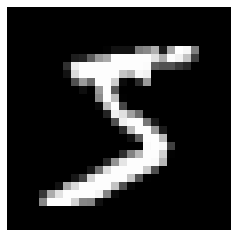

In [5]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test)=mnist.load_data()
plt.figure() 
plt.gray() 
plt.matshow(x_train[0]) 
plt.axis('off')
plt.show()


### Example of GD using Pytorch

This is simply fitting a line using gradient descent

In [3]:
X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = -5 * X
Y = func + 0.2 * torch.randn(X.size())
 
# This is the model USE TORCH METHODS/FUNCTION if doing anything besides elementary operations
def model(x):
    return w * x + b

def model_only_torch(x):
    return torch.add(torch.multiply(w, x), b)
 
# Use L2 difference for loss
def loss_function(y_pred, y):
    return torch.mean((y_pred - y)**2)
 
w = torch.rand(1, requires_grad=True) 
b = torch.rand(1, requires_grad=True)

lr = 1
params = {w, b}
optimizer = torch.optim.Adam(params, lr = lr)
loss_toplot = []
n_iter = 100

for i in range (n_iter):
    optimizer.zero_grad()
    Y_pred = model_only_torch(X)

    loss = loss_function(Y_pred, Y)
    loss_toplot.append(loss.item())
    # this is the backpropagation
    loss.backward()

    #this is the change in 
    optimizer.step()
    
    print(f'n_iter: {i}     |loss: \t{loss.item()}')

n_iter: 0     |loss: 	237.16488647460938
n_iter: 1     |loss: 	156.7163543701172
n_iter: 2     |loss: 	93.27632904052734
n_iter: 3     |loss: 	47.086360931396484
n_iter: 4     |loss: 	17.62427520751953
n_iter: 5     |loss: 	2.9432663917541504
n_iter: 6     |loss: 	0.4328395128250122
n_iter: 7     |loss: 	6.529623031616211
n_iter: 8     |loss: 	16.849498748779297
n_iter: 9     |loss: 	27.1762638092041
n_iter: 10     |loss: 	34.57294845581055
n_iter: 11     |loss: 	37.69961929321289
n_iter: 12     |loss: 	36.50929260253906
n_iter: 13     |loss: 	31.80968475341797
n_iter: 14     |loss: 	24.917768478393555
n_iter: 15     |loss: 	17.317163467407227
n_iter: 16     |loss: 	10.316484451293945
n_iter: 17     |loss: 	4.8391499519348145
n_iter: 18     |loss: 	1.3882701396942139
n_iter: 19     |loss: 	0.0790587067604065
n_iter: 20     |loss: 	0.6513487100601196
n_iter: 21     |loss: 	2.5196874141693115
n_iter: 22     |loss: 	4.9276347160339355
n_iter: 23     |loss: 	7.159345626831055
n_iter: 24   